In [49]:
fn1 = "rémi"
ln1 = "jaylet"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

# <center>  SD204 - TP2 : Linear regression </center>
## <center> REMI JAYLET </center>

### Imports

In [2]:
from scipy.stats import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

### Question 1

In [3]:
df = pd.read_csv("./data_tp_2.csv")
df.head(5)

,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,...,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,...,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,...,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,...,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,...,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2


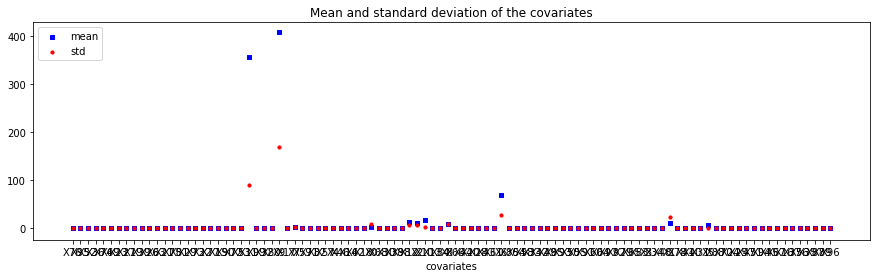

In [4]:
covariates = df[df.columns[0:df.shape[1]-1]]
scores = df[df.columns[-1]]
mean = covariates.mean()
std = covariates.std()


figure = plt.figure(figsize=(15,4))
axes = figure.add_subplot(111)
axes.set_xlabel('covariates')
axes.xaxis.set_ticks(range(len(covariates.columns)))
axes.xaxis.set_ticklabels(list(covariates.columns))
axes.scatter(covariates.columns, mean, s=10, c='b', marker="s", label='mean')
axes.scatter(covariates.columns, std, s=10, c='r', marker="o", label='std')
plt.legend(loc='upper left')
plt.title("Mean and standard deviation of the covariates")
plt.show()

In [5]:
print("Mean of each covariate : \n", mean, "\n")
median = covariates.median()
print("Median of each covariate : \n", median, "\n")
print("Standard deviation of each covariate : \n", std)

Mean of each covariate : 
 X76   -0.032847
X95   -0.029625
X52   -0.018319
X36    0.038119
X74    0.069168
         ...   
X56   -0.058912
X35    0.017652
X87   -0.001100
X89   -0.051964
X96    0.022072
Length: 100, dtype: float64 

Median of each covariate : 
 X76   -0.039929
X95   -0.050345
X52   -0.011161
X36    0.020448
X74    0.067290
         ...   
X56   -0.029397
X35    0.041134
X87   -0.004115
X89   -0.052846
X96    0.022785
Length: 100, dtype: float64 

Standard deviation of each covariate : 
 X76    0.641619
X95    0.692919
X52    0.686342
X36    0.687264
X74    0.667049
         ...   
X56    0.667952
X35    0.659099
X87    0.656129
X89    0.669710
X96    0.645561
Length: 100, dtype: float64


A part from a few points, the data seem to be centered with each covariate having a mean close to 0 and a standard deviation around 0,68. The data is thus not normalized nor standardized as the standard deviation is not equal to 1.

If the variables are not scaled, the features with a higher value will have a much higher importance and while dominate when calculating distances. For instance, for the LASSO method, the variables are defined  entered (easier for the computation and we do not have to compute the intercept). Furthermore, the output is the same as it has the same OLS and predictor without the intercept.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(covariates, scores, test_size = 0.25, random_state=15)

print("Train sample :", X_train.shape)
print("Test sample :", X_test.shape)

Train sample : (379, 100)
Test sample : (127, 100)


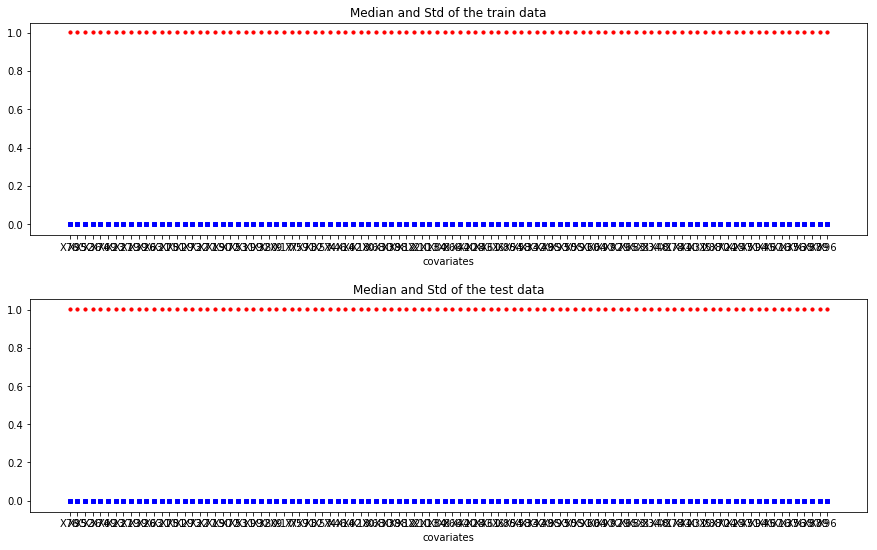

In [7]:
figure = plt.figure(figsize=(15,9))
plt.gcf().subplots_adjust(wspace = 0.3, hspace = 0.3)

axes = figure.add_subplot(211)
scaled_features_train = StandardScaler().fit_transform(X_train)  # standardize training data
X_train_s = pd.DataFrame(scaled_features_train, index=X_train.index, columns=X_train.columns)
axes.set_xlabel('covariates')
axes.xaxis.set_ticks(range(len(X_train_s.columns)))
axes.xaxis.set_ticklabels(list(X_train_s.columns))
plt.scatter(X_train_s.columns, X_train_s.mean(axis=0), s=10, c='b', marker="s", label='mean')
plt.scatter(X_train_s.columns, X_train_s.std(axis=0), s=10, c='r', marker="o", label='std')
plt.title("Median and Std of the train data")

axes = figure.add_subplot(212)
scaled_features_test = StandardScaler().fit_transform(X_test)   # standardize test data
X_test_s = pd.DataFrame(scaled_features_test, index=X_test.index, columns=X_test.columns)
axes.set_xlabel('covariates')
axes.xaxis.set_ticks(range(len(X_test_s.columns)))
axes.xaxis.set_ticklabels(list(X_test_s.columns))
plt.scatter(X_test_s.columns, X_test_s.mean(axis=0), s=10, c='b', marker="s", label='mean')
plt.scatter(X_test_s.columns, X_test_s.std(axis=0), s=10, c='r', marker="o", label='std')
plt.title("Median and Std of the test data")

plt.show()

scaled_covariates = pd.concat([X_train_s,X_test_s],ignore_index=True)    # reconstruct covariate dataframe

The train and test data are now scaled (with a mean around 0 and a stadard deviation of 1).

In [8]:
# new DataFrame with scaled covariates

scaled_df = pd.concat([scaled_covariates, scores], axis=1)
scaled_df.head(5)

,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,...,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.103499,-0.251191,-0.088265,0.084960,0.739888,-0.535462,-2.432828,1.792462,0.551027,-1.715969,...,0.570071,-0.939336,-0.182905,-0.739908,-0.891852,-0.300685,1.220748,-0.479434,0.325844,24.0
1,1.974415,-0.210159,1.295719,-0.928457,0.271881,1.550482,-0.558049,0.297480,1.231585,-1.443904,...,1.425755,1.071557,-1.602674,1.886030,-1.035888,-0.083785,0.281914,0.090982,0.175009,21.6
2,1.422287,0.224736,0.505711,0.332002,-0.293244,1.198841,-0.341346,0.568565,-1.525357,0.493714,...,-0.554016,0.680933,-0.065710,-1.185138,0.516747,0.460296,0.600931,0.094464,-0.165661,34.7
3,0.417268,0.041471,1.358192,0.182352,1.783026,-0.735910,1.448944,-0.488090,1.003316,0.650881,...,0.195646,0.955920,0.882942,0.971638,-1.751836,0.493562,-1.372526,0.347875,0.686555,33.4
4,-1.611400,0.503248,-1.035965,-1.014321,1.406847,1.296868,1.833541,-0.268509,-0.844321,-0.751305,...,1.586993,0.680909,0.469129,3.157710,-0.904650,-1.075248,-0.729435,0.463320,1.397944,36.2


In [9]:
# initialize the empty dataframes

df_test = pd.DataFrame()  # contains the predicted values
df_coef = pd.DataFrame()  # contains the estimated coefficient

### Question 2

In [10]:
# compute the determination coefficient the mean squared error

def mse(y, y_pred):
    error = y - y_pred 
    se = np.sum(error**2) 
    mse = se/len(y)  
    return round(mse,2)

def R2(y, y_pred):
    error = y - y_pred 
    SSE = np.sum(error**2) 
    SST = np.sum((y - np.mean(y))**2) 
    R2 = 1- (SSE/SST) 
    return round(R2,2)

results = pd.DataFrame(index = ["mse", "R2", "alpha"], columns = ["OLS", "pca_OLS", "lasso", "ridge", "FVS"])

### Question 3

In [13]:
ols = LinearRegression().fit(X_train_s, Y_train)
Y_pred = ols.predict(X_test_s)
coef = ols.coef_

print("mse =", mse(Y_test, Y_pred))
print("R2 =", R2(Y_test, Y_pred))

results["OLS"] = [mse(Y_test, Y_pred), R2(Y_test, Y_pred), "None"]

mse = 29.4
R2 = 0.65


In [14]:
df_test["OLS"] = Y_pred
df_coef["OLS"] = coef

df_test

,OLS
0,30.672975
1,43.182117
2,24.453572
3,19.677997
4,27.565943
...,...
122,21.627862
123,32.152458
124,24.404677
125,16.602662


### Question 4

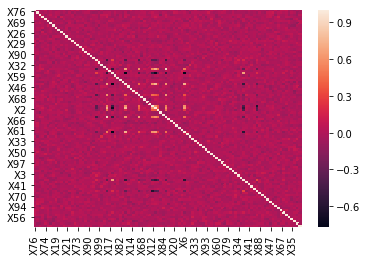

In [15]:
sns.heatmap(scaled_covariates.cov())

The covariance for each covariate differs a lot from one column to another. We can see that some values are highly correlated (bright spots).

### Question 5

In [18]:
U,s,V  = np.linalg.svd(scaled_covariates.cov(), full_matrices=True)

print("U shape :", U.shape, ", s shape :", s.shape,", V shape :",  V.shape)
print("Principal components associated to the eigenvalues values : ", s[0], "and", s[1])

U shape : (100, 100) , s shape : (100,) , V shape : (100, 100)
Principal components associated to the eigenvalues values :  6.399295409547531 and 1.9673943693007856


Text(0.5,1,'PCA plot')

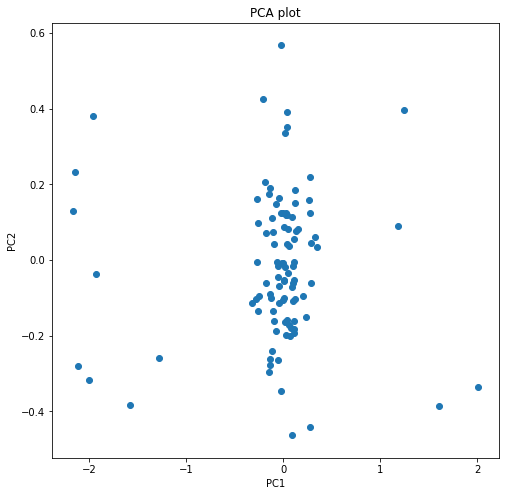

In [19]:
PCs = U@np.diag(s)  # compute the PCs
PC1=PCs[:,0]
PC2=PCs[:,1]

figure = plt.figure(figsize=(8,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(PC1,PC2)
plt.title("PCA plot")

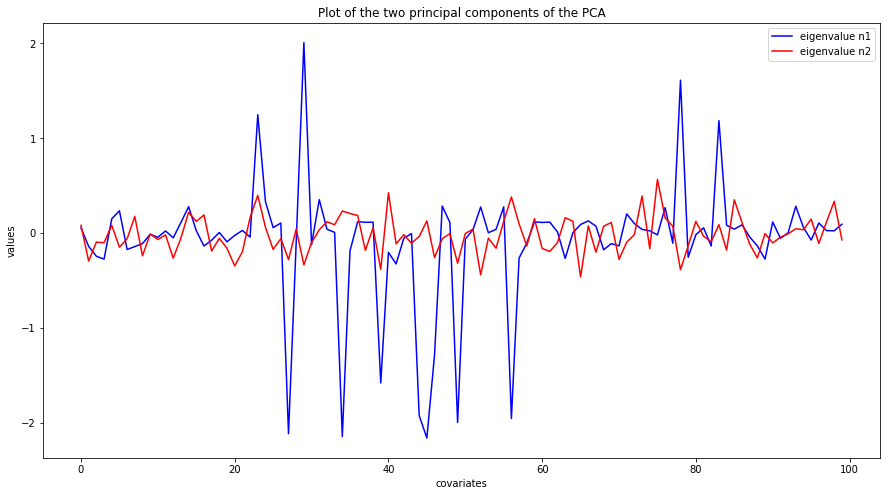

In [20]:
PCs = U@np.diag(s)
PC1=PCs[:,0]
PC2=PCs[:,1]

figure = plt.figure(figsize=(15,8))
plt.xlabel('covariates')
plt.ylabel('values')
plt.plot(PC1, color = 'b', label = 'eigenvalue n1')
plt.plot(PC2, color = 'r', label = 'eigenvalue n2')
plt.title("Plot of the two principal components of the PCA")
plt.legend()
plt.show()

### Question 6

In [23]:
U_train, s_train, V_train  = np.linalg.svd(X_train_s.cov(), full_matrices=True)
U_test, s_test, V_test  = np.linalg.svd(X_test_s.cov(), full_matrices=True)

P_train = U_train[:,:2]@U_train[:,:2].T
X_train_pca = X_train_s@P_train
ols = LinearRegression().fit(X_train_pca, Y_train)

P_test = U_test[:,:2]@U_test[:,:2].T
X_test_pca = X_test_s@P_test

Y_pred_pca = ols.predict(X_test_pca)
coef_pca = ols.coef_

print("mse =", mse(Y_test, Y_pred_pca))
print("R2 =", R2(Y_test, Y_pred_pca))

results["pca_OLS"] = [mse(Y_test, Y_pred_pca), R2(Y_test, Y_pred_pca), "None"]

mse = 54.87
R2 = 0.34


In [24]:
df_test["pca_OLS"] = Y_pred_pca
df_coef["pca_OLS"] = coef_pca

### Question 7

L shape : (100, 100)


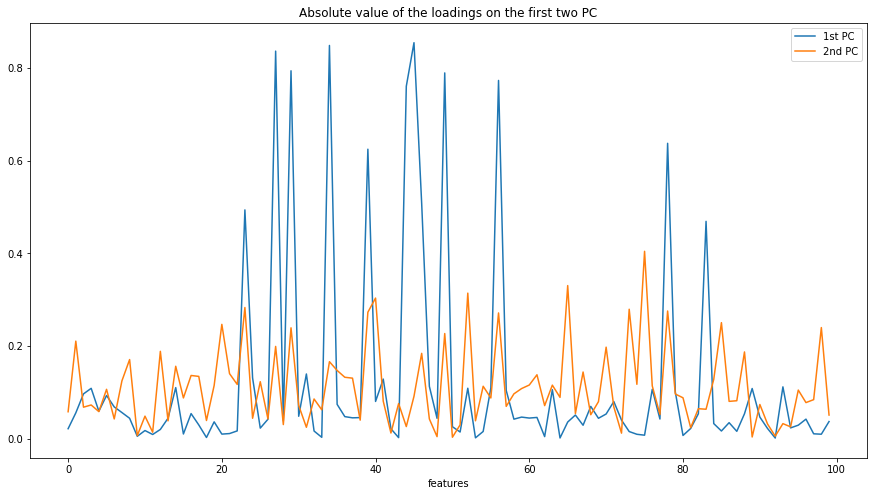

In [25]:
L = U@(np.sqrt(np.diag(s)))  # compute loadings
print("L shape :", L.shape)

L0=L[:,0]
L1=L[:,1]

figure = plt.figure(figsize=(15,8))
plt.plot(abs(L0), label ="1st PC")
plt.plot(abs(L1), label ="2nd PC")
plt.xlabel('features')
plt.title("Absolute value of the loadings on the first two PC")
plt.legend()
plt.show()

### Question 8

In [26]:
model_lasso = LassoCV(alphas=np.logspace(-3, 1, num=30)).fit(X_train_s, Y_train)
Y_pred_lasso = model_lasso.predict(X_test_s)
coef_lasso = model_lasso.coef_

print("alpha = ", round(model_lasso.alpha_,2))
print("mse =", mse(Y_test, Y_pred_lasso))
print("R2 =", R2(Y_test, Y_pred_lasso))

results["lasso"] = [mse(Y_test, Y_pred_lasso), R2(Y_test, Y_pred_lasso), round(model_lasso.alpha_,3)]

alpha =  0.22
mse = 27.26
R2 = 0.67


The LASSO (unlike Ridge and OLS) selects variable  of the coefficient estimates (become  equal to zero,) which makes the regression model easier to interpret.

In [27]:
df_test["lasso"] = Y_pred_lasso
df_coef["lasso"] = coef_lasso

### Question 9

In [29]:
model_ridge = RidgeCV(alphas=np.logspace(-1, 2, num=30)).fit(X_train_s, Y_train)
Y_pred_ridge = model_ridge.predict(X_test_s)
coef_ridge = model_ridge.coef_

print("alpha = ", round(model_ridge.alpha_,2))
print("mse =", mse(Y_test, Y_pred_ridge))
print("R2 =", R2(Y_test, Y_pred_ridge))

results["ridge"] = [mse(Y_test, Y_pred_ridge), R2(Y_test, Y_pred_ridge), round(model_ridge.alpha_,3)]

alpha =  48.94
mse = 29.45
R2 = 0.65


Ridge and LASSO produce a more “regularized” as the coefficient estimates tend towards 0. They reduce the norm of the estimate vector as alpha increases.

In [30]:
df_test["ridge"] = Y_pred_ridge
df_coef["ridge"] = coef_ridge

### Question 10

In [33]:
X = np.array(X_train_s)
Y = Y_train

n,p = np.shape(X)

p_values = []
tests = []
selected_variables = []  # initialize empty variables list
remaining_variables = [i for i in range(p)]  # initialize result variable list

while remaining_variables != []:
    
    T = 0
    T_list = []
    k_select = 0
    X_t = X[:,[0]]
    theta_h = LinearRegression().fit(X_t, Y).coef_
    
    for k in remaining_variables:
        reg = LinearRegression().fit(X[:,[k]], Y)        
        s2 = 1/(np.sum(X[:,k]**2))
        sigma2 = np.linalg.norm(Y - reg.predict(X[:,[k]]))**2 / (n-1)
        T_k = np.linalg.norm(reg.coef_, ord = 1)/(np.sqrt(s2*sigma2))
        
        if np.linalg.norm(T_k) > np.linalg.norm(T):
            T = T_k
            k_select = k
            X_t = X[:,[k]]
            theta_h = reg.coef_
        T_list.append(T_k)  
    
    del remaining_variables[remaining_variables.index(k_select)]
    Y = Y - X_t@theta_h    
    
    selected_variables.append(k_select) 
    p_values.append(2*(1-norm.cdf(T)))
    tests.append(T_list)

print("The selected variables are in this order :" ,selected_variables)


The selected variables are in this order : [44, 83, 29, 46, 18, 9, 20, 77, 97, 62, 24, 49, 79, 84, 16, 78, 4, 99, 75, 42, 15, 8, 89, 54, 38, 80, 47, 10, 33, 36, 94, 40, 22, 56, 34, 53, 31, 0, 32, 73, 1, 67, 50, 91, 58, 28, 85, 19, 45, 92, 13, 41, 71, 3, 87, 82, 25, 69, 14, 35, 39, 76, 30, 64, 59, 68, 12, 55, 66, 61, 21, 37, 86, 43, 5, 7, 11, 60, 74, 96, 93, 23, 65, 17, 57, 90, 6, 88, 26, 48, 70, 81, 27, 63, 2, 98, 72, 52, 51, 95]


### Question 11

In [34]:
X = np.array(X_train_s)
Y = Y_train

n,p = np.shape(X)

f_p_values = []
f_tests = []
f_selected_variables = []  # initialize empty variables list
remaining_variables = [i for i in range(p)]  # initialize result variable list
p = 0

while p < 0.05:
    
    T = 0
    T_list = []
    k_select = 0
    X_t = X[:,[0]]
    theta_h = LinearRegression().fit(X_t, Y).coef_
    
    for k in remaining_variables:
        reg = LinearRegression().fit(X[:,[k]], Y)
        s2 = 1/(np.sum(X[:,k]**2))
        sigma2 = np.linalg.norm(Y - reg.predict(X[:,[k]]))**2 / (n-1)
        T_k = np.linalg.norm(reg.coef_, ord = 1)/(np.sqrt(s2*sigma2))
        
        if np.linalg.norm(T_k) > np.linalg.norm(T):
            T = T_k
            k_select = k
            X_t = X[:,[k]]
            theta_h = reg.coef_
        T_list.append(T_k)
            
    del remaining_variables[remaining_variables.index(k_select)]
    Y = Y - X_t@theta_h    
    
    f_selected_variables.append(k_select)
    p = 2*(1-norm.cdf(T))
    f_p_values.append(p)
    f_tests.append(T_list)

print("The selected variables with the criterion are: ", f_selected_variables)


The selected variables with the criterion are:  [44, 83, 29, 46, 18, 9, 20, 77, 97, 62, 24]


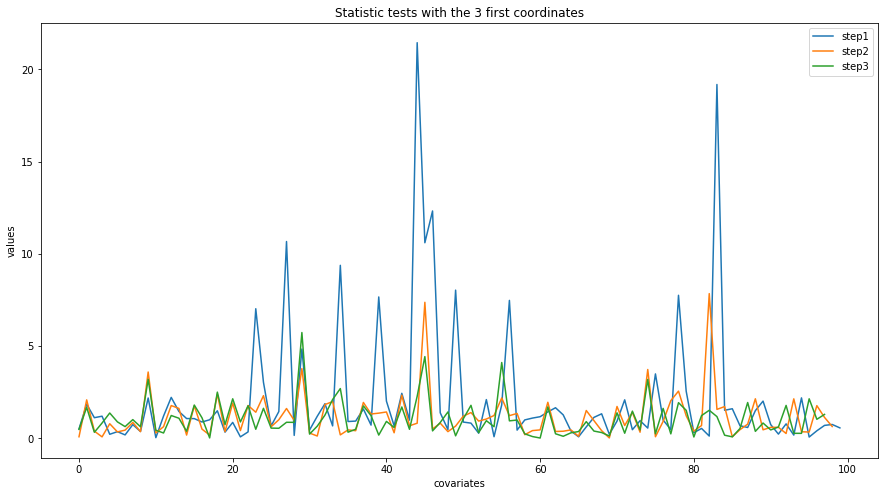

In [35]:
figure = plt.figure(figsize=(15,8))
for i in range(3):
    plt.plot(np.arange(len(tests[i])), tests[i], label = "step" + str(i+1))
plt.title("Statistic tests with the 3 first coordinates")
plt.xlabel("covariates")
plt.ylabel("values")
plt.legend()
plt.show()

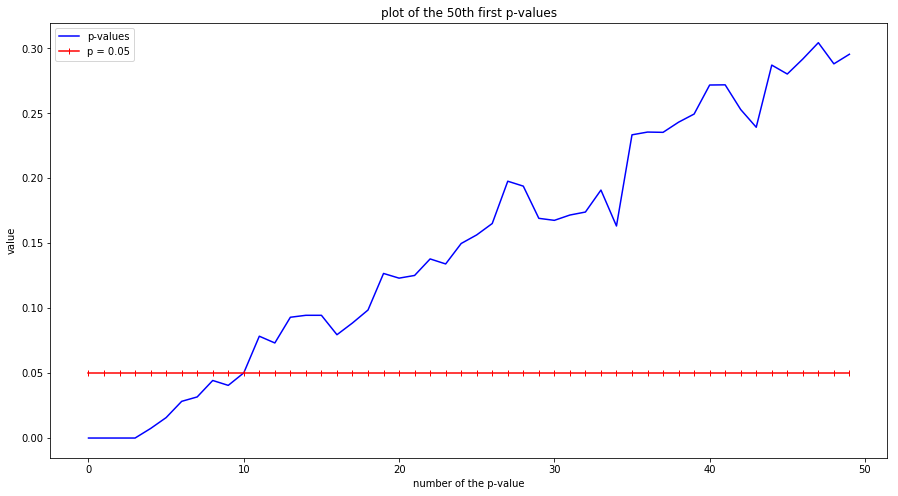

In [36]:
figure = plt.figure(figsize=(15,8))
plt.plot(p_values[:50], c='b',label = "p-values")
plt.plot([0.05 for i in range(50)], c='r', marker="|",label = "p = 0.05")
plt.legend()
plt.xlabel("number of the p-value")
plt.ylabel("value")
plt.title("plot of the 50th first p-values")
plt.show()

### Question 12

In [37]:
for i in range(len(f_selected_variables)) :
    f_selected_variables[i] = str(f_selected_variables[i])
    f_selected_variables[i] = 'X' + f_selected_variables[i]

In [39]:
X_train_fvs = X_train_s[f_selected_variables]
X_test_fvs = X_test_s[f_selected_variables]

ols = LinearRegression().fit(X_train_fvs, Y_train)
Y_pred_fvs = ols.predict(X_test_fvs)
coef_fvs = ols.coef_

print("mse =", mse(Y_test, Y_pred_fvs))
print("R2 =", R2(Y_test, Y_pred_fvs))

results["FVS"] = [mse(Y_test, Y_pred_fvs), R2(Y_test, Y_pred_fvs), "None"]

mse = 69.94
R2 = 0.16


In [40]:
df_test["FVS"] = Y_pred_fvs

coef_fvs = ["None"]*100
for i in range(len(f_selected_variables)-1):
    coef_fvs[int(f_selected_variables[i].replace("X",""))] = ols.coef_[i]

df_coef["FVS"] = coef_fvs

df_coef["FVS"][15:30]

15        None
16        None
17        None
18    0.102238
19        None
20   -0.298688
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29    0.420943
Name: FVS, dtype: object

### Question 13

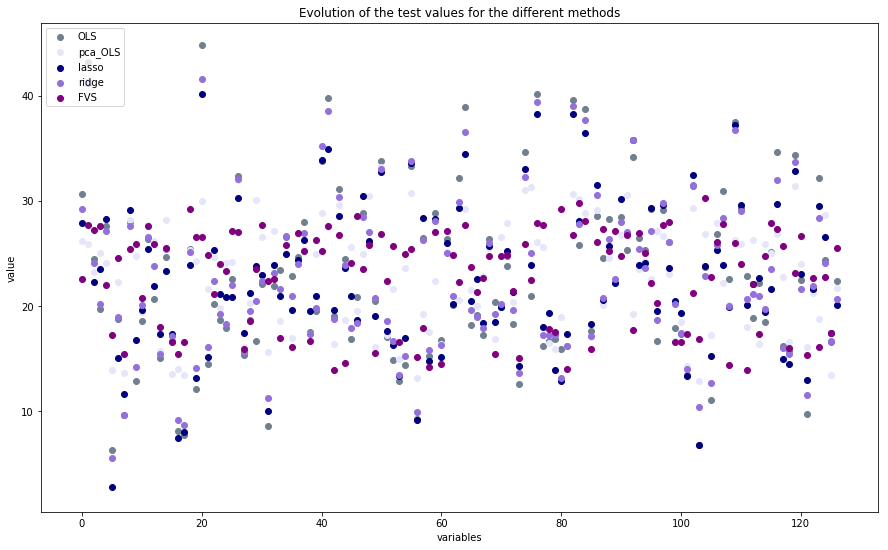

In [41]:
figure = plt.figure(figsize=(15,9))

plt.scatter(np.arange(0,len(df_test["OLS"])), df_test["OLS"], label="OLS", color="slategrey")
plt.scatter(np.arange(0,len(df_test["OLS"])), df_test["pca_OLS"], label="pca_OLS", color="lavender")
plt.scatter(np.arange(0,len(df_test["OLS"])), df_test["lasso"], label="lasso", color="navy")
plt.scatter(np.arange(0,len(df_test["OLS"])), df_test["ridge"], label="ridge", color="mediumpurple")
plt.scatter(np.arange(0,len(df_test["OLS"])), df_test["FVS"], label="FVS", color="purple")

plt.title("Evolution of the test values for the different methods")
plt.legend(loc='upper left')
plt.xlabel("variables")
plt.ylabel("value")
plt.show()

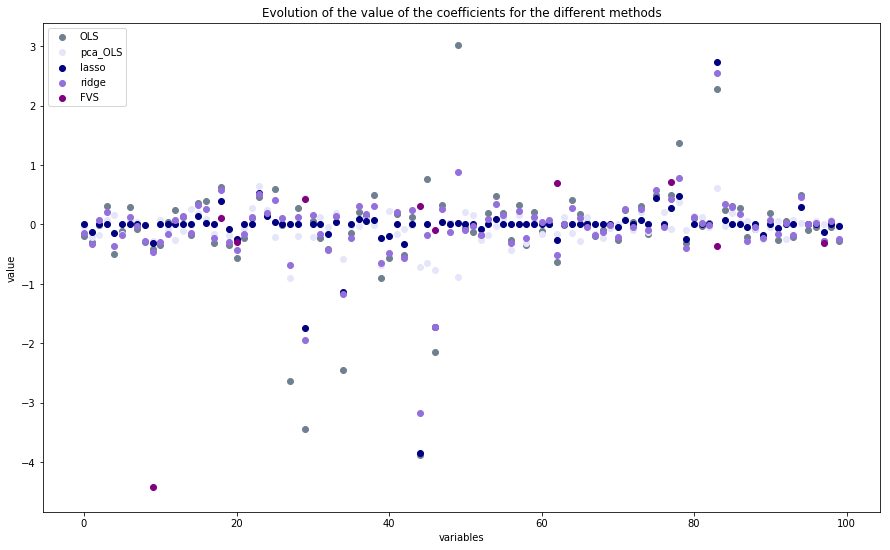

In [42]:
x_fvs,y_fvs = [], []
for i in range(len(df_coef["FVS"])):
    if df_coef["FVS"][i] != "None" :
        x_fvs.append(i) 
        y_fvs.append(df_coef["FVS"][i])

figure = plt.figure(figsize=(15,9))

plt.scatter(np.arange(0,len(df_coef["OLS"])), df_coef["OLS"], label="OLS", color="slategrey")
plt.scatter(np.arange(0,len(df_coef["OLS"])), df_coef["pca_OLS"], label="pca_OLS", color="lavender")
plt.scatter(np.arange(0,len(df_coef["OLS"])), df_coef["lasso"], label="lasso", color="navy")
plt.scatter(np.arange(0,len(df_coef["OLS"])), df_coef["ridge"], label="ridge", color="mediumpurple")
plt.scatter(x_fvs, y_fvs, label="FVS", color="purple")

plt.title("Evolution of the value of the coefficients for the different methods")
plt.legend(loc='upper left')
plt.xlabel("variables")
plt.ylabel("value")
plt.show()

The coefficients obtained with Ridge and OLS are quite similar. The coefficient of LASSO and FVS also have similarities as they give a particular importance only for certain coefficients that produce  simpler models.

### Question 14

In [43]:
null_count = [0]*len(df_coef)

for i in range(len(df_coef["OLS"])):
    if df_coef["OLS"][i] == 0:
        null_count[0]+=1
    if df_coef["pca_OLS"][i] == 0:
        null_count[1]+=1
    if df_coef["lasso"][i] == 0:
        null_count[2]+=1
    if df_coef["ridge"][i] == 0:
        null_count[3]+=1
    if df_coef["FVS"][i] == "None":
        null_count[4]+=1

print("Number of null elements for the OLS method :", null_count[0])
print("Number of null elements for the pca_OLS method :", null_count[1])
print("Number of null elements for the lasso method :", null_count[2])
print("Number of null elements for the ridge method :", null_count[3])
print("Number of null elements for the FVS method :", null_count[4])

Number of null elements for the OLS method : 0
Number of null elements for the pca_OLS method : 0
Number of null elements for the lasso method : 54
Number of null elements for the ridge method : 0
Number of null elements for the FVS method : 90


The Lasso and the FVS both eliminate a lot of the elements. Ridge has a lot of coefficients close to 0 but none are actually equal to 0.

### Question 15

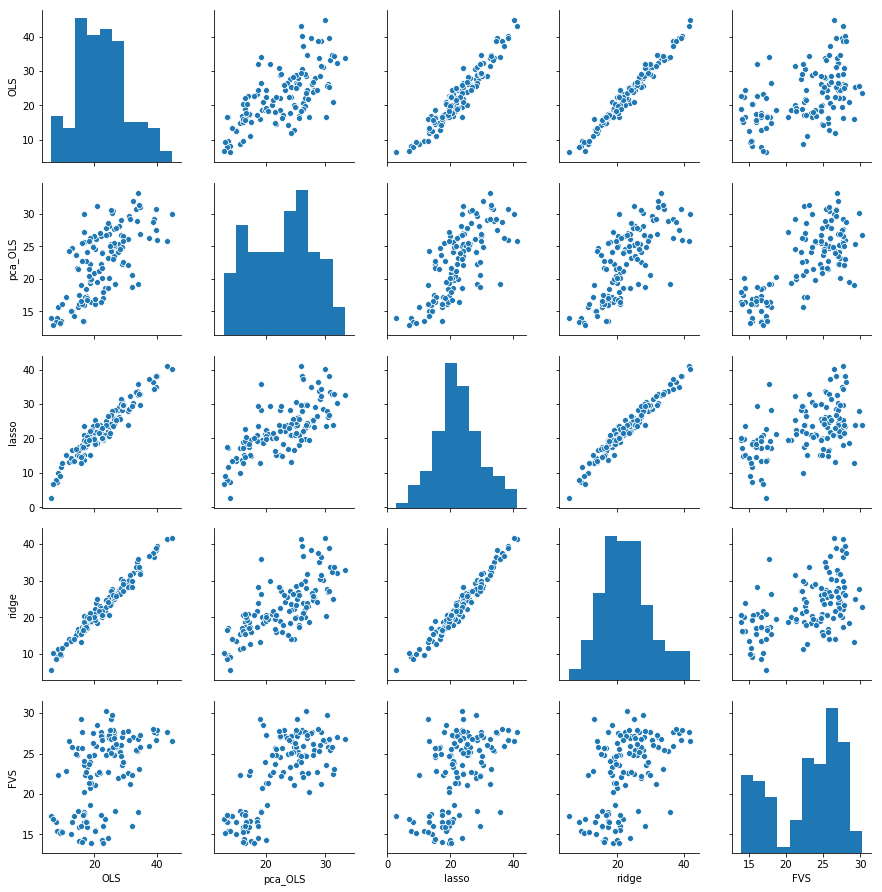

In [44]:
sns.pairplot(df_test)

We can see on the diagonal, the histogram of the 5 columns of df_test. The variables seems to follow a gaussian distribution.

On the other element of the plot (i,j), we can see that the variables seem to be correlated as we can see a linear dependance that is more or less pronounced depending on the cases. We can see that Ridge, LASSO and OLS have close results and have big similarities. PCA before OLS and FVS are much more different of the other methods.

### Conclusion

In [45]:
print("Comparaison of the caracteristics of each methods \n")
results

Comparaison of the caracteristics of each methods 



,OLS,pca_OLS,lasso,ridge,FVS
mse,29.4,54.87,27.260,29.450,69.94
R2,0.65,0.34,0.670,0.650,0.16
alpha,None,None,0.221,48.939,None


OLS, Ridge and LASSO avec R2 that are around 0.6, whereas the coefficient is much lower for the to other methods. This also has an impact on the mse.

In [47]:
print("Comparaison of the predicted values")
df_coef

Comparaison of the predicted values


,OLS,pca_OLS,lasso,ridge,FVS
0,-0.200406,-0.033146,-0.000000,-0.148960,None
1,-0.303013,-0.208152,-0.120789,-0.328662,None
2,-0.017340,-0.184790,0.000000,0.071523,None
3,0.306719,0.082811,0.000000,0.216809,None
4,-0.504397,0.161941,-0.139518,-0.360672,None
...,...,...,...,...,...
95,-0.091373,0.005775,0.000000,0.010096,None
96,-0.041317,0.062546,0.000000,0.025658,None
97,-0.286451,0.002290,-0.119599,-0.270081,-0.314126
98,-0.040819,0.077050,0.000000,0.061149,None


In [48]:
print("Comparaison of the estimated coefficient")
df_test

Comparaison of the estimated coefficient


,OLS,pca_OLS,lasso,ridge,FVS
0,30.672975,26.129915,27.855552,29.244761,22.585896
1,43.182117,25.858476,41.165485,41.296789,27.675365
2,24.453572,23.181347,22.291803,24.129306,27.228503
3,19.677997,25.027688,23.546834,20.162321,27.599399
4,27.565943,24.124165,28.278968,27.148408,21.992142
...,...,...,...,...,...
122,21.627862,21.242432,21.637044,21.847391,22.677922
123,32.152458,18.723017,29.487627,28.329648,16.064338
124,24.404677,28.613187,26.519777,24.081458,22.755465
125,16.602662,13.433381,17.395197,16.651609,17.456823
